In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
from pandas.core.interchange.dataframe_protocol import DataFrame
from google.colab import files
import io
archivo=files.upload()
data=pd.read_csv(io.BytesIO(archivo['HCV-Egy-Data9.csv']),delimiter=",")

Saving HCV-Egy-Data9.csv to HCV-Egy-Data9.csv


In [ ]:
data.head(7)

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1
5,58,2,22,2,2,2,1,2,2,1,...,73,114,29,1157452,1086852,5,5,5,4,4
6,42,2,26,1,1,2,2,2,2,2,...,84,80,28,325694,1034008,275095,214566,635157,12,4


In [ ]:
print(data.groupby("Baselinehistological staging").size())

Baselinehistological staging
1    336
2    332
3    355
4    362
dtype: int64


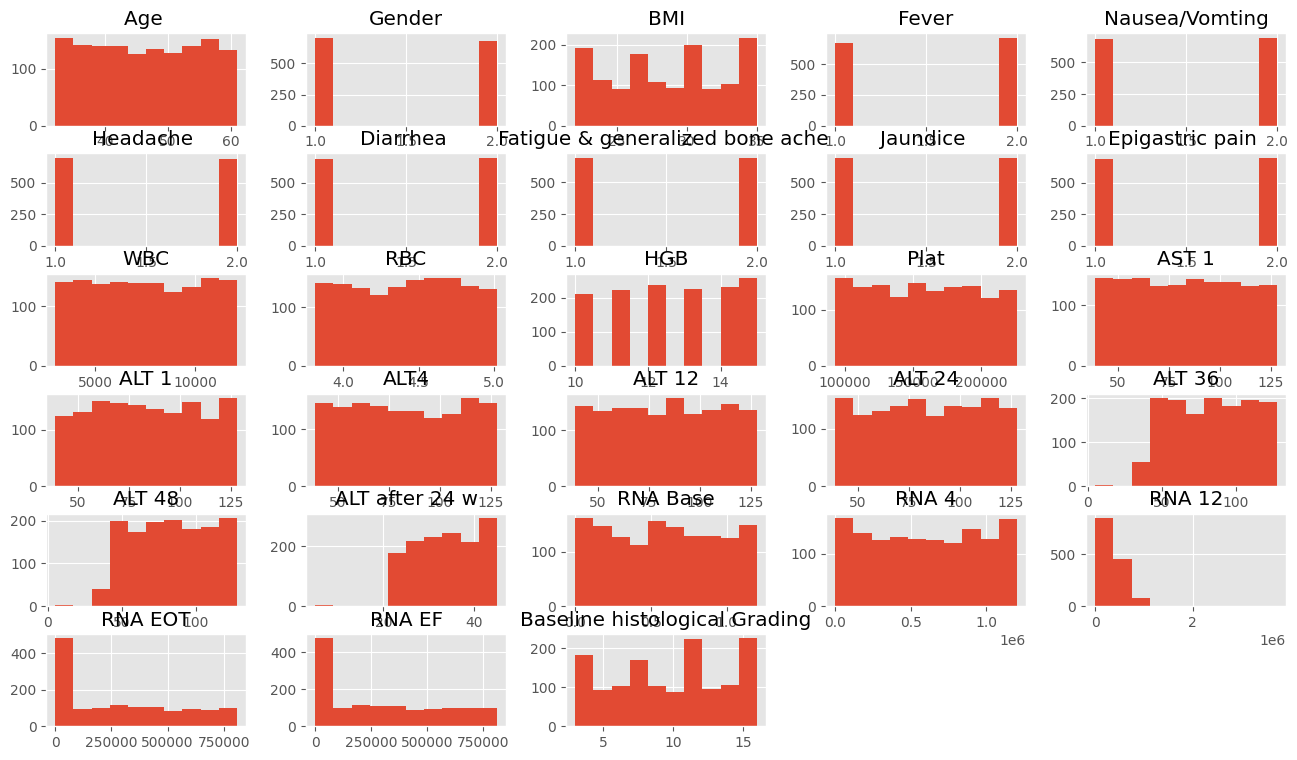

In [ ]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

data.drop(["Baselinehistological staging"],axis=1).hist()
plt.show()

<Axes: title={'center': 'Correlation of Features'}>

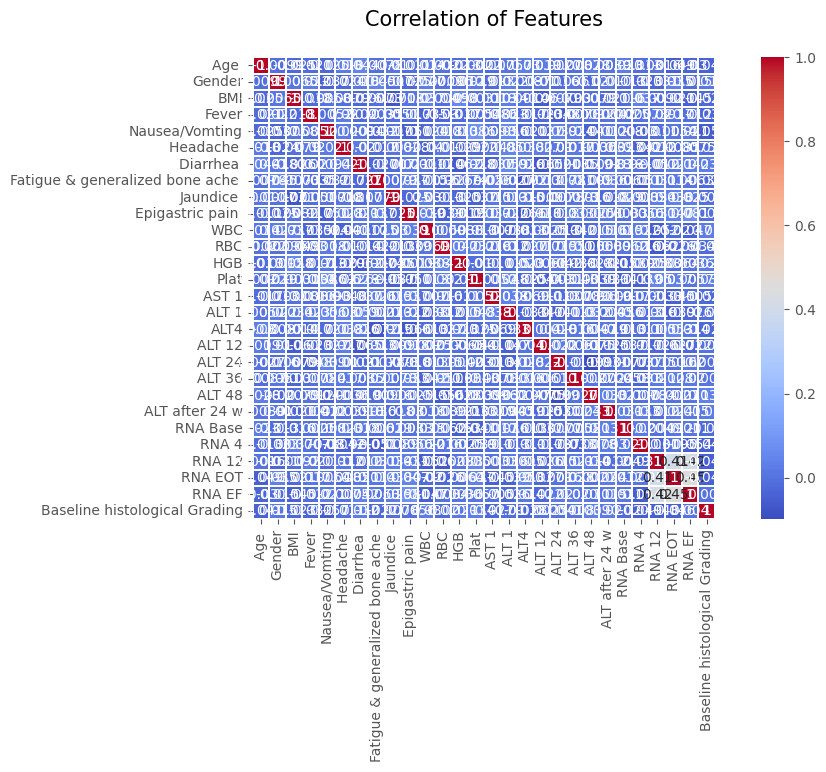

In [ ]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(12,6))
plt.title('Correlation of Features', y=1.05, size=15)
sb.heatmap(data.drop(['Baselinehistological staging'], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
X=data.drop(["Baselinehistological staging"],axis=1)
y=data["Baselinehistological staging"]

print(X.shape)
print(y.shape)

(1385, 28)
(1385,)


In [ ]:
XTrain, XTest, yTrain, yTest=train_test_split(X,y,test_size=0.2,random_state=6)
print(yTrain)

857     1
87      4
1375    2
1247    2
581     4
       ..
335     4
618     2
227     1
713     2
906     4
Name: Baselinehistological staging, Length: 1108, dtype: int64


Normalización de los datos

In [ ]:
escalador=MinMaxScaler()
XTrain=escalador.fit_transform(XTrain)
XTest=escalador.transform(XTest)

Implementación de la MSV

In [ ]:
modelo=SVC()
modelo.fit(XTrain,yTrain)
yPredict=modelo.predict(XTest)
print("Accruracy=",metrics.accuracy_score(yTest,yPredict))

Accruracy= 0.24548736462093862


[[ 9 19 27 24]
 [ 8 21 12 15]
 [14 15 17 22]
 [15 19 19 21]]


<Axes: >

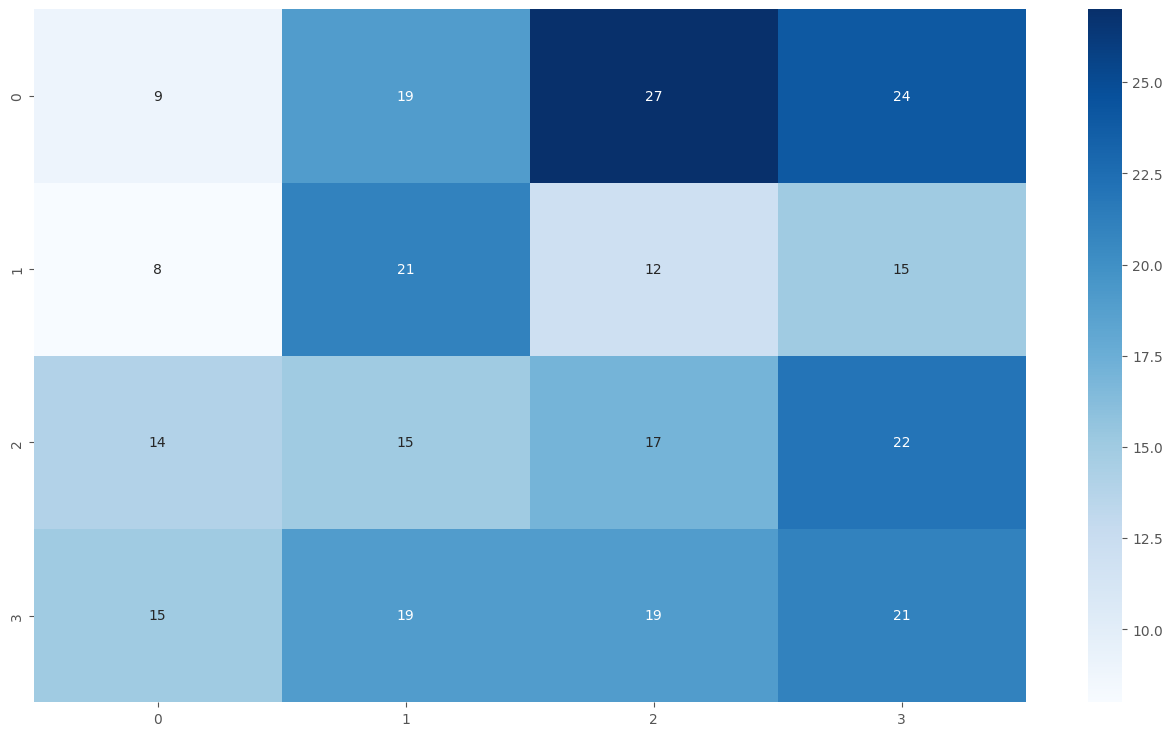

In [ ]:
matriz=confusion_matrix(yTest,yPredict)
print(matriz)
sb.heatmap(matriz,annot=True,cmap="Blues")

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
precision_recall_fscore_support(yTest,yPredict, average=None)
target_names = ["fibrosis portal","pocos septos", "muchos septos", "cirrosis "]
print(classification_report(yTest,yPredict, target_names=target_names))

                 precision    recall  f1-score   support

fibrosis portal       0.20      0.11      0.14        79
   pocos septos       0.28      0.38      0.32        56
  muchos septos       0.23      0.25      0.24        68
      cirrosis        0.26      0.28      0.27        74

       accuracy                           0.25       277
      macro avg       0.24      0.26      0.24       277
   weighted avg       0.24      0.25      0.24       277



Prueba kernel polinomial

In [ ]:
modelo=SVC(kernel='poly')
modelo.fit(XTrain,yTrain)
yPredict=modelo.predict(XTest)
print("Accuracy =",metrics.accuracy_score(yTest,yPredict))
matriz=confusion_matrix(yTest,yPredict)
print(matriz)

Accuracy = 0.23826714801444043
[[13 22 23 21]
 [12 20 10 14]
 [17 16 14 21]
 [22 15 18 19]]


Prueba kernel rbf

In [ ]:
modelo=SVC(kernel='rbf')
modelo.fit(XTrain,yTrain)
yPredict=modelo.predict(XTest)
print("Accuracy =",metrics.accuracy_score(yTest,yPredict))
matriz=confusion_matrix(yTest,yPredict)
print(matriz)

Accuracy = 0.24548736462093862
[[ 9 19 27 24]
 [ 8 21 12 15]
 [14 15 17 22]
 [15 19 19 21]]


Prueba kernel lineal

In [ ]:
modelo=SVC(kernel='linear')
modelo.fit(XTrain,yTrain)
yPredict=modelo.predict(XTest)
print("Accuracy =",metrics.accuracy_score(yTest,yPredict))
matriz=confusion_matrix(yTest,yPredict)
print(matriz)

Accuracy = 0.26353790613718414
[[13 25 15 26]
 [13 18 15 10]
 [13 22 14 19]
 [15 18 13 28]]


In [ ]:
from sklearn.model_selection import cross_val_score
escalar=MinMaxScaler()
X=escalar.fit_transform(X)
print(X.shape)
print(y.shape)
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy') #cv is cross validation
print("Accuracy =",metrics.accuracy_score(yTest,yPredict))
print(scores)
print("Promedio de puntajes ",scores.mean())

(1385, 28)
(1385,)
Accuracy = 0.26353790613718414
[0.25631769 0.28880866 0.25631769 0.24909747 0.27797834]
Promedio de puntajes  0.2657039711191335


In [ ]:
metrics.precision_recall_fscore_support(yTest,yPredict,average=None)
etiquetas=["fibrosis portal","pocos septos", "muchos septos", "cirrosis "]
print(classification_report(yTest,yPredict,target_names=etiquetas))

                 precision    recall  f1-score   support

fibrosis portal       0.24      0.16      0.20        79
   pocos septos       0.22      0.32      0.26        56
  muchos septos       0.25      0.21      0.22        68
      cirrosis        0.34      0.38      0.36        74

       accuracy                           0.26       277
      macro avg       0.26      0.27      0.26       277
   weighted avg       0.26      0.26      0.26       277

